In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
days_since_first = 47  #first case March 6th

In [4]:
days = np.array(range(days_since_first))
time_since_first = np.array(range(days_since_first-1))
time_since_first

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [5]:
days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [6]:
days_short = days[0:-32]
days_short

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [7]:
cases = [1, 5, 5, 9, 13, 22, 23, 26, 27, 35, 41, 50, 69, 89, 113, 117,134, 158, 177,201,231,263,295, 314,330, 347, 375, 396,416,435,454,467,483,502,539,558,557,595,612,618,626,642,649,655,660,662, 669]
new_cases_per_day = np.diff(cases)
new_cases_per_day

array([ 4,  0,  4,  4,  9,  1,  3,  1,  8,  6,  9, 19, 20, 24,  4, 17, 24,
       19, 24, 30, 32, 32, 19, 16, 17, 28, 21, 20, 19, 19, 13, 16, 19, 37,
       19, -1, 38, 17,  6,  8, 16,  7,  6,  5,  2,  7])

In [8]:
cases_short = cases[0:-32]
len(cases_short)

15

In [9]:
recovered = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,4,4,4,6,11,13,16,18,24,29,30,42,49,56,62,66,67,74,88,97,112,124, 150])
deaths = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,5,6,6])
print(len(recovered),len(deaths))

47 47


In [10]:
active = cases - recovered - deaths
active

array([  1,   5,   5,   9,  13,  22,  23,  26,  27,  35,  41,  50,  68,
        87, 109, 113, 130, 154, 173, 197, 227, 258, 290, 309, 324, 341,
       369, 388, 403, 420, 436, 446, 456, 470, 506, 513, 505, 536, 547,
       548, 555, 564, 557, 554, 543, 532, 513])

In [11]:
pdata = {'Days': days, 'Cases': np.array(cases).astype('float64'), 'Recovered': recovered, 'Deaths': deaths}
data = pd.DataFrame(pdata)
data.head()

,Days,Cases,Recovered,Deaths
0,0,1.0,0,0
1,1,5.0,0,0
2,2,5.0,0,0
3,3,9.0,0,0
4,4,13.0,0,0


In [12]:
data.describe()

,Days,Cases,Recovered,Deaths
count,47.000000,47.000000,47.000000,47.000000
mean,23.000000,312.021277,24.872340,2.085106
std,13.711309,241.872270,38.246692,1.599318
min,0.000000,1.000000,0.000000,0.000000
25%,11.500000,59.500000,0.000000,0.500000
50%,23.000000,314.000000,3.000000,2.000000
75%,34.500000,548.000000,36.000000,3.000000
max,46.000000,669.000000,150.000000,6.000000


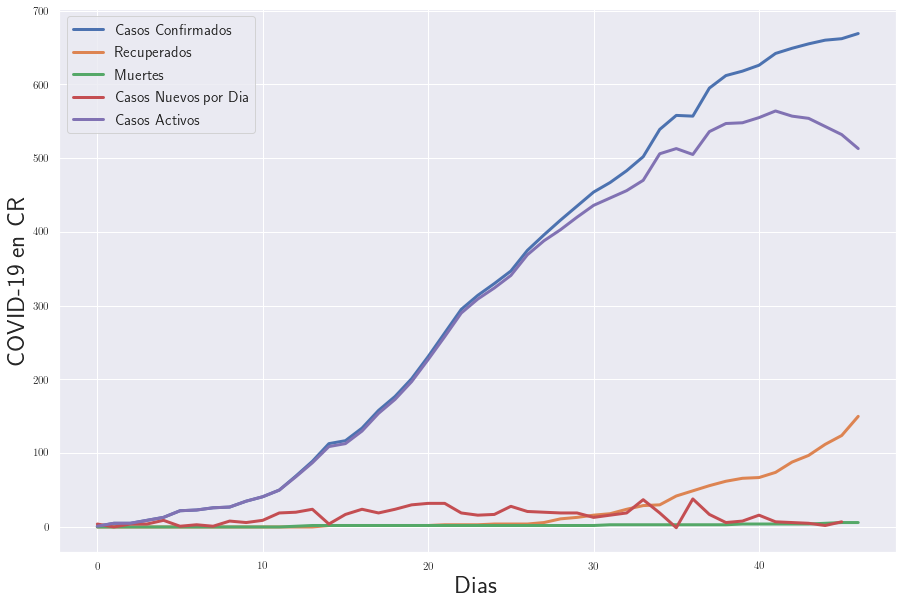

In [13]:
plt.plot(days, cases, label='Casos Confirmados', linewidth=3)
plt.plot(days, recovered, label='Recuperados', linewidth=3)
plt.plot(days, deaths, label='Muertes', linewidth=3)
plt.plot(time_since_first, new_cases_per_day, label='Casos Nuevos por Dia', linewidth=3)
plt.plot(days, active, label='Casos Activos', linewidth=3)
plt.xlabel('Dias', fontsize=25)
plt.ylabel('COVID-19 en CR', fontsize=25)
plt.legend(loc='best', fontsize=15)
plt.show()

## Exponentials

In [14]:
def ExpFit(x, n, a):
    f = n*np.exp(a*x)
    return f

In [15]:
def SigFit(x, n, b, c):
    f = n*(1/(1+np.exp(-b*(x-c))))
    return f

In [16]:
#PArameters EXP
p = [1,1]
#Fit
c, cov = curve_fit(ExpFit, days_short, cases_short)

#Parameters Exp2
p1 = [1,1]
c1, cov1 = curve_fit(ExpFit, days, cases)

In [17]:
c

array([4.57709   , 0.22745685])

In [18]:
c1

array([-5.793569e-15,  1.000000e+00])

In [19]:
N_0, a = c[0], c[1]
N_0, a 

(4.577090000373798, 0.22745684999031793)

In [20]:
n, b1 = c1[0], c1[1]
n, b1

(-5.793569000149796e-15, 1.0000000004628131)

In [21]:
perr = np.sqrt(np.diag(cov))
N_0_pm, a_pm = perr[0], perr[1]
N_0_pm, a_pm

(0.540296879921435, 0.00947202416007359)

In [22]:
perr1 = np.sqrt(np.diag(cov1))
n_pm, b1_pm = perr1[0], perr1[1]
n_pm, b1_pm

(9.321815552444174e-14, 2.8653148701847473e-08)

In [23]:
from uncertainties import unumpy


In [24]:
variables = unumpy.uarray([N_0, a], (N_0_pm.round(1), a_pm.round(2)))
variables

array([4.577090000373798+/-0.5, 0.22745684999031793+/-0.01], dtype=object)

In [25]:
variables1 = unumpy.uarray([n, b1], (n_pm.round(1), b1_pm.round(2)))
variables1

array([-5.793569000149796e-15+/-0, 1.0000000004628131+/-0], dtype=object)

In [26]:
t = np.arange(0,days_since_first, 0.2)
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2,
       26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4,
       28.6, 28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30

In [27]:
predicted = ExpFit(t, N_0, a)

In [28]:
predicted1 = ExpFit(t, n, b1)

In [29]:
#next three days:
xs = np.array([days_since_first + 1, days_since_first + 2, days_since_first +3])
pred_next_three = ExpFit(xs, N_0, a)
pred_next_three = variables[0]*unumpy.exp(variables[1]*xs) 
pred_next_three

array([252455.99231093645+/-124277.42472381704,
       316934.07775369496+/-159110.16066727843,
       397880.07692790095+/-203632.72026857533], dtype=object)

In [30]:
pred1_next_three =ExpFit(t, n, b1)
pred1_next_three = variables1[0]*unumpy.exp(variables1[1]*xs) 
pred1_next_three

array([-4065194.456565094+/-0, -11050344.22554757+/-0,
       -30037949.92042523+/-0], dtype=object)

In [31]:
#Sigmoid
#pred_sig_next_three = SigFit(xs, n, b1, c1)
#pred_sig_next_three

In [32]:
tau = 1/variables[1]
tau

4.396438269687488+/-0.1932866945917272

In [33]:
tau1 = 1/variables1[1]
tau1

0.9999999995371869+/-0

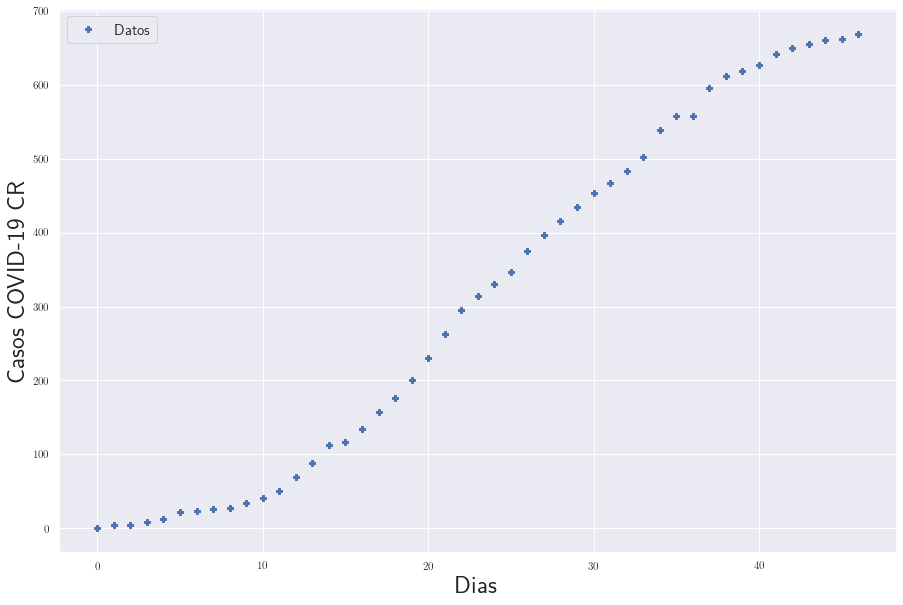

In [34]:
plt.plot(days, cases, 'P', label='Datos')
#plt.plot(t, predicted, '--', label='Ajuste Exponencial (Al 20 de marzo)')
#plt.plot(t, predicted1, '--', label='Ajuste Exponencial (Al 24 de marzo')
plt.xlabel('Dias', fontsize=25)
plt.ylabel('Casos COVID-19 CR', fontsize=25)
plt.legend(loc='best',fontsize=15)
plt.show()

## ARIMA Model

In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
res = adfuller(data['Cases'])
print('ADF Statistic: %f' %res[0])
print('p-Value: %f' %res[1])

ADF Statistic: -1.152510
p-Value: 0.693684


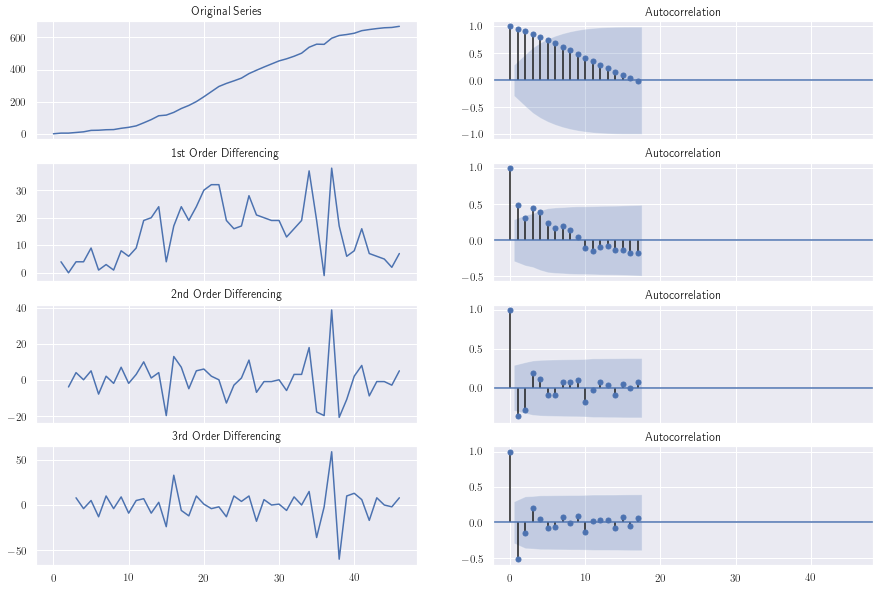

In [37]:
fig, axes = plt.subplots(4, 2, sharex=True)
#Cases
axes[0, 0].plot(data['Cases']); axes[0, 0].set_title('Original Series')
plot_acf(data['Cases'], ax=axes[0, 1])

#1st Difference
diff1 = data['Cases'].diff()
axes[1, 0].plot(diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1.dropna(), ax=axes[1,1])


#2nd Difference
diff2 = diff1.diff()
axes[2, 0].plot(diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2.dropna(), ax=axes[2,1])


#3rd Difference
diff3 = diff2.diff()
axes[3, 0].plot(diff3); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(diff3.dropna(), ax=axes[3,1])

plt.show()




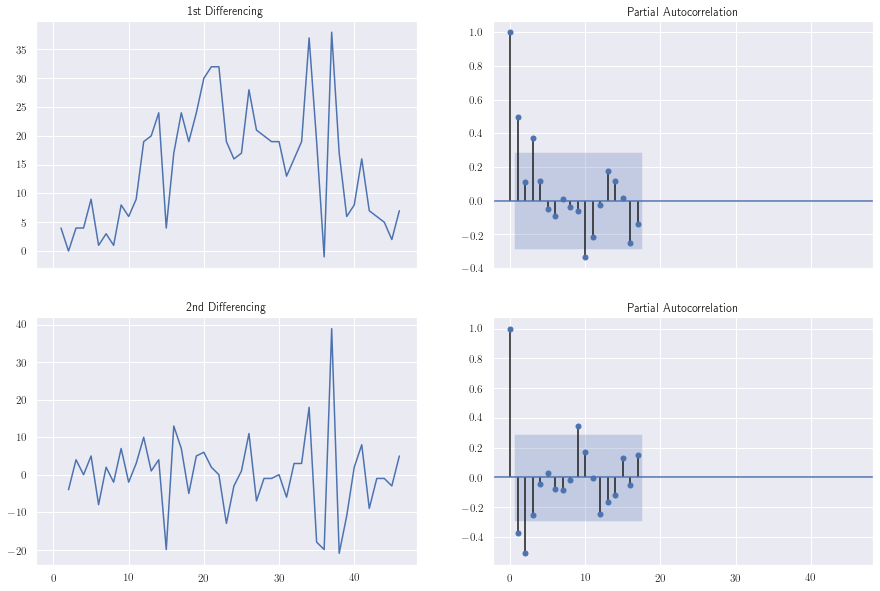

In [38]:
fig, axes = plt.subplots(2, 2, sharex=True)

axes[0,0].plot(diff1); axes[0,0].set_title('1st Differencing')
plot_pacf(diff1.dropna(), ax=axes[0,1])

axes[1,0].plot(diff2); axes[1,0].set_title('2nd Differencing')
plot_pacf(diff2.dropna(), ax=axes[1,1])

plt.show()


# 1 order of lag is enough

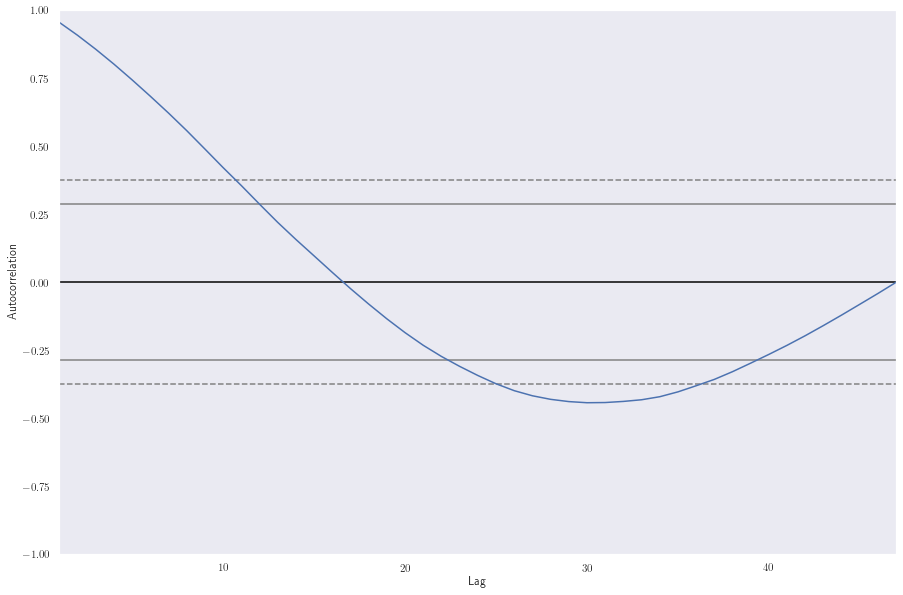

In [39]:
pd.plotting.autocorrelation_plot(data['Cases']) #Basically no significant autocorrelation

In [40]:
model = ARIMA(data['Cases'], order=(7,2,2))

In [41]:
model_fit = model.fit()

/home/andres/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [42]:
model_fit.summary()

/home/andres/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/andres/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/andres/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/andres/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Cases   No. Observations:                   45
Model:                 ARIMA(7, 2, 2)   Log Likelihood                -170.201
Method:                       css-mle   S.D. of innovations              7.529
Date:                Tue, 21 Apr 2020   AIC                            362.402
Time:                        15:55:53   BIC                            382.276
Sample:                             2   HQIC                           369.811
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2111        nan        nan        nan         nan         nan
ar.L1.D2.Cases    -0.7266        nan        nan        nan         nan         nan
ar.L2.D2.Cases    -1.4685   5.46e-05  -2.69e+04      0.000      -1.469      -1.468
ar.L3.D2.Cases    -0.7413   3.43e-05  -2.16e+04      0.000      -0.741      -0.741
ar.L4.D2.Cases    -0.4179   3.66e-06  -1.14e+05      0.000      -0.418      -0.418
ar.L5.D2.Cases    -0.1022   9.76e-07  -1.05e+05      0.000      -0.102      -0.102
ar.L6.D2.Cases     0.0715        nan        nan        nan         nan         nan
ar.L7.D2.Cases    -0.0984        nan        nan        nan         nan         nan
ma.L1.D2.Cases     0.0386        nan        nan        nan         nan         nan
ma.L2.D2.Cases     1.0000      0.048     20.740      0.000       0.905       1.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0123           -0.9999j            1.0000           -0.2480
AR.2            0.0123           +0.9999j            1.0000            0.2480
AR.3           -0.5063           -1.0856j            1.1978           -0.3194
AR.4           -0.5063           +1.0856j            1.1978            0.3194
AR.5           -1.4467           -0.0000j            1.4467           -0.5000
AR.6            1.5803           -1.5484j            2.2124           -0.1234
AR.7            1.5803           +1.5484j            2.2124            0.1234
MA.1           -0.0193           -0.9998j            1.0000           -0.2531
MA.2           -0.0193           +0.9998j            1.0000            0.2531
-----------------------------------------------------------------------------
"""

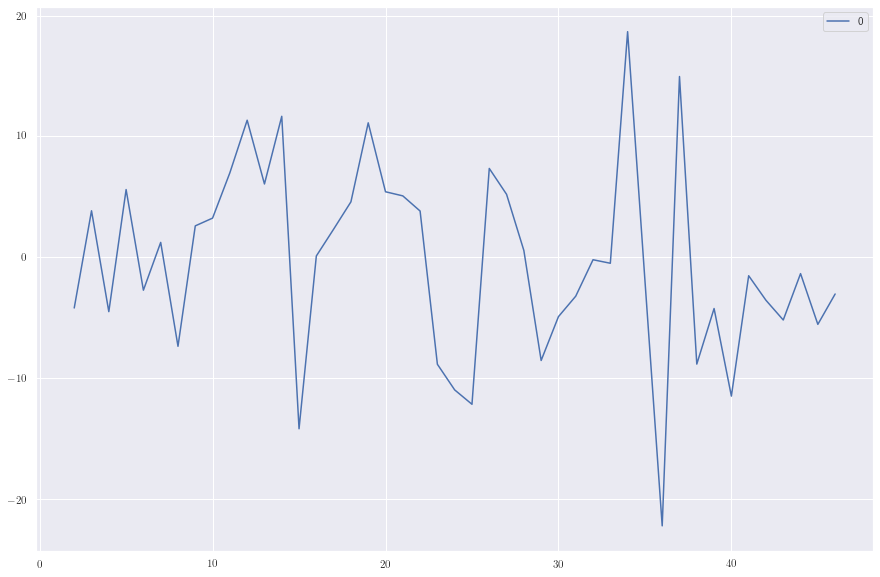

In [43]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

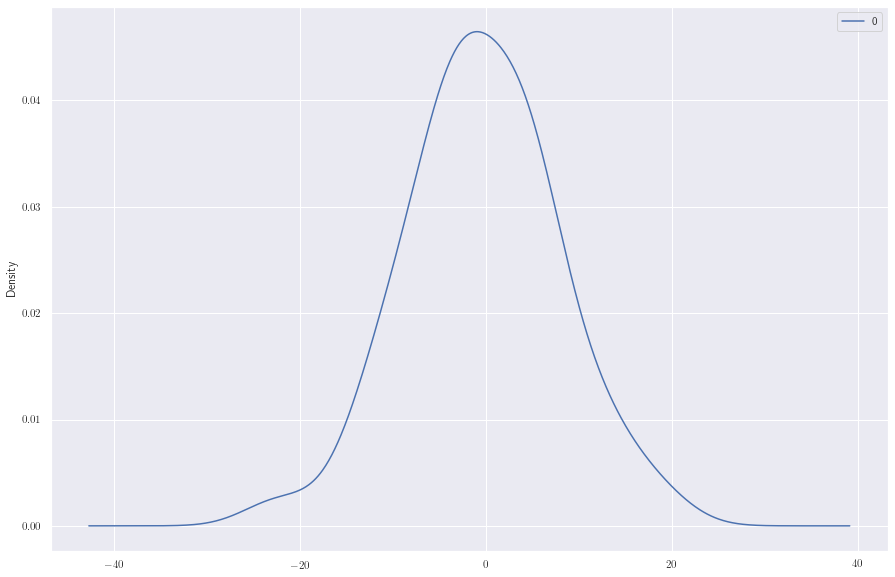

In [44]:
residuals.plot(kind='kde')

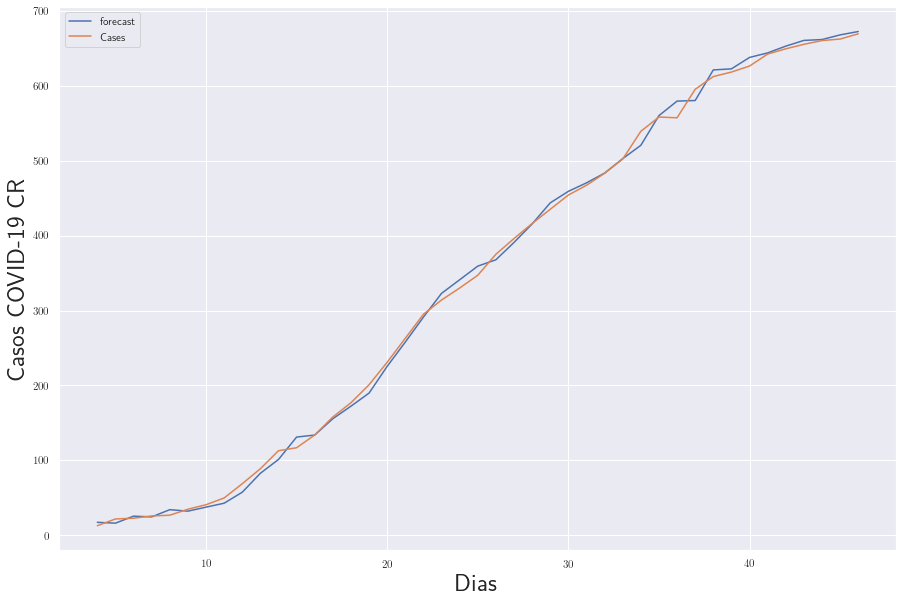

In [45]:
model_fit.plot_predict(dynamic=False)
plt.xlabel('Dias', fontsize=25)
plt.ylabel('Casos COVID-19 CR', fontsize=25)
plt.show()

In [46]:
forecast = model_fit.forecast(3)

In [47]:
d1, d2, d3 = forecast[0][0], forecast[0][1], forecast[0][2]
d1, d2, d3

(674.4885602788329, 672.9402733983761, 678.134622448099)

In [48]:
pms = (abs(forecast[2][:,0] - forecast[2][:,1])/2).round(0)
pms

array([15., 24., 34.])

# Model
$ N(t) = N_0e^{at}$  



$N(t) = N_0\left(\frac{1}{1+ae^{-bx}}\right)$

Con t en días

### Al 18 de marzo 

$N_0 = 5.5 \pm 0.7$, 


$a = 0.20 \pm 0.01$

#### Predicciones: 

$19/3: 81 \pm 11$, 

$20/3: 99 \pm 14$

$21/3 :122 \pm 17$


### Al 19 de Marzo 

$N_0 = 5.0 \pm 0.7$

$a = 0.22 \pm 0.01  \Rightarrow \tau_c = 4.6 \pm 0.2$

#### Predicciones:


$20/3: 133  \pm 27$

$21/3: 166 \pm 35$

$222/3 :200 \pm 28$

### Al 20 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

#### Predicciones:


$21/3: 174  \pm 34$,                                                        ARIMA: $135 \pm 9$

$22/3: 218 \pm 44$,                                                         ARIMA : $155 \pm 19$

$23/3 :274 \pm 57$,                                                         ARIMA: $173 \pm 30$

### Al 21 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$



#### Predicciones:


$22/3: 174  \pm 34$,                                                       ARIMA: $135 \pm 9$

$23/3: 218 \pm 44$,                                                         ARIMA : $155 \pm 19$

$24/3 :274 \pm 57$,                                                         ARIMA: $173 \pm 30$

### Al 22 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 6.7 \pm 0.9$

$b_1 = 0.19 \pm 0.01$


#### Predicciones:

###### Exponentials


$23/3:$ exp 1$274  \pm 57$,   exp2  $210 \pm 47$                                         ARIMA: $144 \pm 13$

$25/3:$  exp 1$344 \pm 75$,     exp 2 $254 \pm 59$                                       ARIMA : $160 \pm 22$

$25/3:$ exp1$432 \pm 98$,       exp 2$308 \pm 74$                                             ARIMA: $174 \pm 36$

### Al 23 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 7.4 \pm 0.9$

$b_1 = 0.18 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,0)

$24/3:$ exp1 $344  \pm 75$,   exp2  $238 \pm 53$                                         ARIMA: $176 \pm 13$

$25/3:$  exp1 $432 \pm 98$,     exp 2 $286 \pm 66$                                       ARIMA : $198 \pm 24$

$26/3:$ exp1 $513 \pm 128$,       exp2 $343 \pm 83$                                        ARIMA: $221 \pm 35$

### Al 24 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 8.4 \pm 0.1$

$b_1 = 0.17 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,0)

$25/3:$ exp1 $432  \pm 98$,   exp2  $265 \pm 61$                                         ARIMA: $199 \pm 13$

$26/3:$  exp1 $543 \pm 128$,     exp 2 $315 \pm 76$                                       ARIMA : $222 \pm 23$

$27/3:$ exp1 $682 \pm 167$,       exp2 $374 \pm 93$                                        ARIMA: $246 \pm 34$

### Al 25 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 9.3 \pm 0.1$

$b_1 = 0.16 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

$26/3:$ exp1 $543  \pm 128$,   exp2  $295 \pm 71$                                         ARIMA: $224 \pm 10$

$27/3:$  exp1 $682 \pm 167$,     exp 2 $348 \pm 87$                                       ARIMA : $248 \pm 15$

$28/3:$ exp1 $856 \pm 218$,       exp2 $312 \pm 106$                                        ARIMA: $273 \pm 18$

### Al 26 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 10 \pm 0.1$

$b_1 = 0.16 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$26/3: $  exp2  $331 \pm 81$                                         ARIMA: $258 \pm 10$

$27/3:$     exp 2 $388 \pm 99$                                       ARIMA : $283 \pm 15$

$28/3 : $      exp2 $455 \pm 120$                                        ARIMA: $311 \pm 19$


### Al 27 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 10 \pm 0.1$

$b_1 = 0.16 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$28/3: $  exp2  $372 \pm 93$                                         ARIMA: $292 \pm 10$

$29/3:$     exp 2 $434 \pm 113$                                       ARIMA : $321 \pm 16$

$30/3 : $      exp2 $506 \pm 136$                                        ARIMA: $351 \pm 20$


### Al 29 de Marzo 


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$30/3: $  exp2  $372 \pm 93$                                         ARIMA: $342 \pm 11$

$31/3:$     exp 2 $434 \pm 113$                                       ARIMA : $374 \pm 16$

$1/4 : $      exp2 $506 \pm 136$                                        ARIMA: $407 \pm 20$

### Al 30 de Marzo 


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$31/3: $  exp2  $476 \pm 135$                                         ARIMA: $357 \pm 11$

$1/4:$     exp 2 $544 \pm 157$                                       ARIMA : $388 \pm 19$

$2/4 : $      exp2 $621 \pm 187$                                        ARIMA: $420 \pm 24$

### Al 30 de Marzo 


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$31/3: $  exp2  $500 \pm 149$                                         ARIMA: $371 \pm 11$

$1/4:$     exp 2 $566 \pm 174$                                       ARIMA : $399 \pm 19$

$2/4 : $      exp2 $641 \pm 202$                                        ARIMA: $428 \pm 24$

### Al 16 de Abril


#### Predicciones:

######  ARIMA (2,2,2)

EXP 1 and 2 is deprecated for predictions!

17/4 ARIMA: $657 \pm 17$

18/4 ARIMA : $669 \pm 28$

19/4 ARIMA: $683 \pm 36$

### Al 19 de Abril


#### Predicciones:

######  ARIMA (5,2,2)

EXP 1 and 2 is deprecated for predictions!

20/4 ARIMA: $667 \pm 16$

21/4 ARIMA : $675 \pm 27$

22/4 ARIMA: $680 \pm 36$

###### ARIMA (7,2,2)

20/4 ARIMA: $671 \pm 15$

21/4 ARIMA : $683 \pm 24$

22/4 ARIMA: $689 \pm 35$

### Al 20 de Abril


#### Predicciones:

######  ARIMA (5,2,2)

EXP 1 and 2 is deprecated for predictions!

21/4 ARIMA: $667 \pm 16$

22/4 ARIMA : $675 \pm 27$

23/4 ARIMA: $680 \pm 36$

###### ARIMA (7,2,2)

21/4 ARIMA: $673 \pm 15$

22/4 ARIMA : $680 \pm 24$

23/4 ARIMA: $680 \pm 34$


